In [135]:
def twinLength(text,d,i):
    t=0
    if i<d:
        print("indexes in wrong order")
        return -1
    if i==d:
        return 0
    for j in range(0,min(i-d,len(text)-i)):
        #print(str(d+j)+" -- "+ str(j+i))
        if text[d+j]==text[j+i]:
            t=t+1
        else:
            return t
        
    return t

In [136]:
def twinStart_N_length(text,i):
    d_t_max=i
    t_max=0
    
    for j in range(0,i+1):
        #print(str(text[j])+"=="+str(text[i]))
        if text[j]==text[i]:
            d=j
            t=twinLength(text,d,i)
            
            if t>t_max:
                t_max = t
                d_t_max = d
                
    return (d_t_max,t_max)

In [137]:
twinStart_N_length(text,1)

(1, 0)

In [209]:
text =  ['a', 'b', 'a','a','b','b','a','a','b','a']
text2 = ['a', 'a', 'a', 'b', 'b', 'a', 'b', 'b', 'a', 'b']

In [224]:
import random
def random_text(N):
    test = []
    char_dict={0:'a', 1:'b'}
    
    for i in range(0,N):
        test.append(char_dict[random.randint(0,1)])
    return test

In [210]:
def compress(text):
    j=0
    i = 0
    text_new = []
    while(i<len(text)):
        d,l = twinStart_N_length(text, i)
        if l == 0:
            elem = text[i]
        else:
            elem = (i-d,l)
        text_new.append(elem)
        i+=max(l,1)
        j+=1
    return text_new

In [215]:
def size_compresse(text):
    siz = 0
    for elem in text:
        if type(elem) is str:
            #print(str(elem)+' is a string')
            siz+=8
        elif type(elem) is tuple:
            #print(str(elem)+' is a tuple')
            siz+=32
        else:
            print('unrecognised element error')
            return None
    return siz

In [240]:
import time
t = []
for N in range(4900,5000, 100):
    print(N)
    
    t1 = random_text(N)
    t2 = random_text(N)
    start = time.time()
    C12=compress(t1+t2)
    H12 = size_compresse(C12)
    C2=compress(t2)
    H2 = size_compresse(C2)
    C1 = compress(t1)
    H1 = size_compresse(C1)
    C11 = compress(t1+t1)
    H11 = size_compresse(C11)
    t.append(time.time()-start)

4900


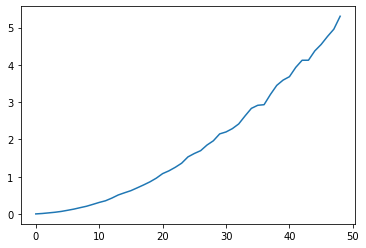

In [238]:
import matplotlib.pyplot as plt
plt.plot(t)

In [241]:
print(t)

[5.1199469566345215]


In [216]:
( size_compresse(compress(text+text))-size_compresse(compress(text)) ) /size_compresse(compress(text))

0.2222222222222222

In [219]:
print(compress(text+text))
print(compress(text))

['a', 'b', (2, 1), (3, 2), (4, 4), (7, 3), (10, 8)]
['a', 'b', (2, 1), (3, 2), (4, 4), (9, 1)]


In [162]:
def Dizionario(text):
    i=0
    N = 0
    D = {}
    while(i<len(text)):
        print(i)
        d,l = twinStart_N_length(text, i)
        if l == 0:
            D[N] = text[i]
            N+=1
            i+=1
        else:
            if l==1:
                i+=1
            else:
                D[N] = text[i:i+l]
                N+=1
                i+=l
                
    return D

In [164]:
print(Dizionario(text))

0
1
2
3
5
9
{0: 0, 1: 1, 2: [0, 1], 3: [1, 0, 0, 1]}
